## Observations and Insights 

In [90]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.DataFrame(mouse_metadata)
study_df = pd.DataFrame(study_results)
combined_df = pd.merge(mouse_df, study_df, on = 'Mouse ID')
# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
total_mice = len(combined_df['Mouse ID'].value_counts())
print(f"There are {total_mice} unique mice")

There are 249 unique mice


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
ID_Time = combined_df[['Mouse ID', 'Timepoint']]
duplicated_mouse = []
duplicate_test = ID_Time.duplicated()
duplicate_test.value_counts()
combined_df['Duplicated'] = duplicate_test
for index, row in combined_df.iterrows():
    if row['Duplicated'] == True:
        duplicated_mouse.append(row['Mouse ID'])
duplicated_mouse


['g989', 'g989', 'g989', 'g989', 'g989']

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
for index, row in combined_df.iterrows():
    if row['Mouse ID'] == "g989":
        print(row)


Mouse ID                  g989
Drug Regimen          Propriva
Sex                     Female
Age_months                  21
Weight (g)                  26
Timepoint                    0
Tumor Volume (mm3)          45
Metastatic Sites             0
Duplicated               False
Name: 908, dtype: object
Mouse ID                  g989
Drug Regimen          Propriva
Sex                     Female
Age_months                  21
Weight (g)                  26
Timepoint                    0
Tumor Volume (mm3)          45
Metastatic Sites             0
Duplicated                True
Name: 909, dtype: object
Mouse ID                  g989
Drug Regimen          Propriva
Sex                     Female
Age_months                  21
Weight (g)                  26
Timepoint                    5
Tumor Volume (mm3)     48.7868
Metastatic Sites             0
Duplicated               False
Name: 910, dtype: object
Mouse ID                  g989
Drug Regimen          Propriva
Sex                     Fe

In [6]:

combined_df.drop(combined_df.loc[combined_df['Mouse ID']=="g989"].index, inplace=True)

In [7]:

total_mice_clean = len(combined_df['Mouse ID'].value_counts())
total_mice_clean

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
reg_df = combined_df[['Drug Regimen', 'Tumor Volume (mm3)']]
drugs = combined_df['Drug Regimen'].unique()
drugs
means = []
medians = []
variances = []
devs = []
sems = []
for drug in drugs:
    means.append(np.mean(reg_df.loc[reg_df['Drug Regimen']==drug, 'Tumor Volume (mm3)']))
    medians.append(np.median(reg_df.loc[reg_df['Drug Regimen']==drug, 'Tumor Volume (mm3)']))
    variances.append(np.var(reg_df.loc[reg_df['Drug Regimen']==drug, 'Tumor Volume (mm3)']))
    devs.append(np.std(reg_df.loc[reg_df['Drug Regimen']==drug, 'Tumor Volume (mm3)']))
    sems.append(st.sem(reg_df.loc[reg_df['Drug Regimen']==drug, 'Tumor Volume (mm3)']))

    
drug_stats_dict = {"Drug Name": drugs}
drug_stats = pd.DataFrame(drug_stats_dict)
drug_stats['Mean'] = means
drug_stats['Median'] = medians
drug_stats['Variance'] = variances
drug_stats['Standard Deviation'] = devs
drug_stats['SEM'] = sems
drug_stats

,Drug Name,Mean,Median,Variance,Standard Deviation,SEM
0,Ramicane,40.216745,40.673236,23.383692,4.835669,0.320955
1,Capomulin,40.675741,41.557809,24.839296,4.983904,0.329346
2,Infubinol,52.884795,51.820584,42.886388,6.548770,0.492236
3,Placebo,54.033581,52.288934,60.830138,7.799368,0.581331
4,Ceftamin,52.591172,51.776157,39.069446,6.250556,0.469821
5,Stelasyn,54.233149,52.431737,59.122106,7.689090,0.573111
6,Zoniferol,53.236507,51.818479,48.266689,6.947423,0.516398
7,Ketapril,55.235638,53.698743,68.188930,8.257659,0.603860
8,Propriva,52.320930,50.446266,43.555716,6.599675,0.544332
9,Naftisol,54.331565,52.509285,65.817708,8.112811,0.596466


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

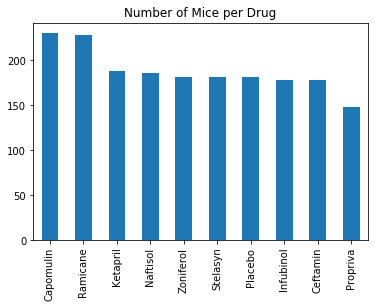

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_count = combined_df['Drug Regimen'].value_counts()
mice_chart = mice_count.plot(kind="bar", title="Number of Mice per Drug")

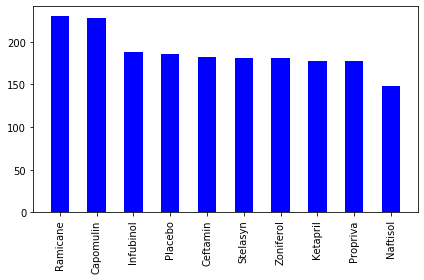

In [26]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drugs
bar_df = pd.DataFrame(combined_df['Drug Regimen'].value_counts())
x_axis = np.arange(len(bar_df["Drug Regimen"]))
plt.bar(x_axis, bar_df['Drug Regimen'], color="b", alpha=1, align="center", width = .5)
plt.xticks(x_axis, drugs, rotation='vertical')
plt.tight_layout()

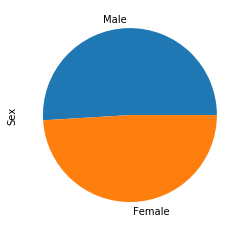

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = combined_df['Sex'].value_counts()
gender_count.plot.pie()

([<matplotlib.patches.Wedge at 0x23d9dacdd08>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')])

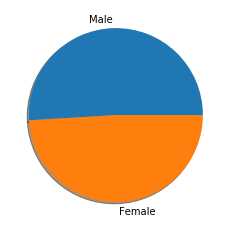

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
plt.pie(gender_count, labels=labels, shadow=True)

## Quartiles, Outliers and Boxplots

In [113]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
mouse_group = combined_df.groupby('Mouse ID')
maximums = mouse_group['Timepoint'].max()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
combined_merged = combined_df.merge(maximums, on='Mouse ID')
finals = combined_merged[combined_merged['Timepoint_x'] == combined_merged['Timepoint_y']]
finals

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
9,k403,Ramicane,Male,21,16,45,22.050126,1,45
19,s185,Capomulin,Female,3,17,45,23.343598,1,45
29,x401,Capomulin,Female,16,15,45,28.484033,0,45
39,m601,Capomulin,Male,22,17,45,28.430964,1,45
49,g791,Ramicane,Male,11,16,45,29.128472,1,45
...,...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0,5
1862,z435,Propriva,Female,12,26,10,48.710661,0,10
1872,z581,Infubinol,Female,24,25,45,62.754451,3,45
1882,z795,Naftisol,Female,13,29,45,65.741070,3,45


In [142]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
max_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    # Determine outliers using upper and lower bounds


In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

Text(0.5, 1.0, 'Tumor Volume over time for Mouse s185')

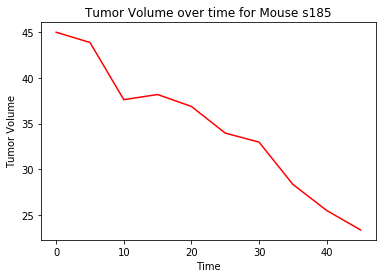

In [129]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df= combined_df[combined_df['Drug Regimen'] == 'Capomulin']
capomulin_s185 = capomulin_df[capomulin_df['Mouse ID'] == 's185']
capomulin_s185
capomulin_time = plt.plot(capomulin_s185['Timepoint'], capomulin_s185['Tumor Volume (mm3)'], color="red")
plt.xlabel('Time')
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume over time for Mouse s185")

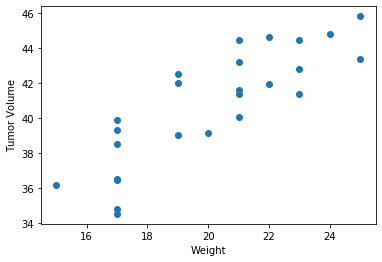

In [133]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_means = capomulin_df.groupby('Mouse ID').mean()
plt.scatter(cap_means['Weight (g)'], cap_means['Tumor Volume (mm3)'])
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.show()




## Correlation and Regression

In [135]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr = st.pearsonr(cap_means['Weight (g)'], cap_means['Tumor Volume (mm3)'])
print(f"The correlation coefficient between Weight and Tumor Volume is {round(corr[0],2)}")

The correlation coefficient between Weight and Tumor Volume is 0.84


In [138]:
weight = cap_means['Weight (g)']
tvol = cap_means['Tumor Volume (mm3)']

w_slope, w_int, w_r, w_p, w_std_err = st.linregress(weight, tvol)

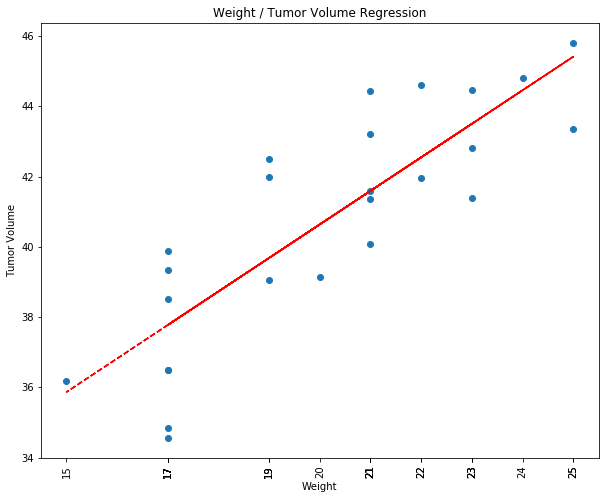

In [141]:
w_fit = w_slope * weight + w_int
plt.figure(figsize=(10,8))
plt.scatter(weight, tvol)
plt.plot(weight, w_fit, linestyle="--", color='red')

plt.xticks(weight, rotation=90)
plt.title("Weight / Tumor Volume Regression")
plt.xlabel('Weight')
plt.ylabel('Tumor Volume')
plt.show()